In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

np.random.seed(9)

In [2]:
train = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

In [3]:
y_train = train["label"]
x_train = train.drop(columns = ["label"], axis = 1)

(array([4132., 4684., 4177., 4351., 4072., 3795., 4137., 4401., 4063.,
        4188.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

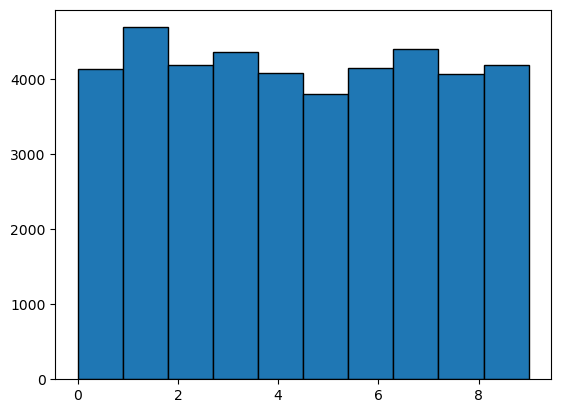

In [4]:
plt.hist(y_train,edgecolor='black')


In [5]:
x_train.isnull().sum().sum()

0

In [6]:
test.isnull().sum().sum()

0

In [7]:
x_train = x_train / 255.0
test = test / 255.0

In [8]:
x_train = x_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [9]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [10]:
y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
random_seed = 9

In [13]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state = random_seed)

In [14]:
len(x_train)

37800

In [15]:
len(x_val)

4200

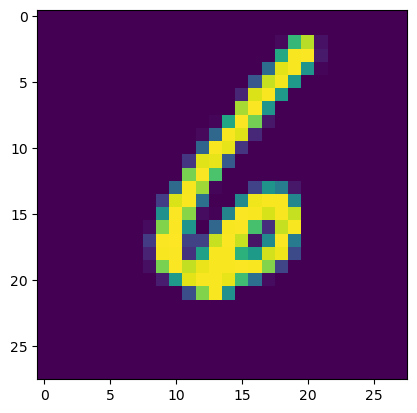

In [16]:
plt.imshow(x_train[2][:,:,0])

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint


In [18]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        36928     
                                                        

In [20]:
model.compile(optimizer = Adam() , loss = "categorical_crossentropy", metrics=["accuracy"])

In [21]:
checkpoint = ModelCheckpoint(filepath='best_model.h5', monitor='val_accuracy', save_best_only=True)

In [22]:
model.fit(x_train,y_train, epochs=20, batch_size=32, validation_data=(x_val, y_val), callbacks = [checkpoint])

Epoch 1/20


2023-06-20 05:12:35.813522: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1182/1182 [==============================] - 13s 6ms/step - loss: 0.2108 - accuracy: 0.9322 - val_loss: 0.0502 - val_accuracy: 0.9831
Epoch 2/20
1182/1182 [==============================] - 6s 5ms/step - loss: 0.0776 - accuracy: 0.9772 - val_loss: 0.0393 - val_accuracy: 0.9881
Epoch 3/20
1182/1182 [==============================] - 6s 5ms/step - loss: 0.0576 - accuracy: 0.9834 - val_loss: 0.0430 - val_accuracy: 0.9860
Epoch 4/20
1182/1182 [==============================] - 6s 5ms/step - loss: 0.0482 - accuracy: 0.9858 - val_loss: 0.0319 - val_accuracy: 0.9907
Epoch 5/20
1182/1182 [==============================] - 7s 6ms/step - loss: 0.0433 - accuracy: 0.9876 - val_loss: 0.0256 - val_accuracy: 0.9917
Epoch 6/20
1182/1182 [==============================] - 6s 5ms/step - loss: 0.0371 - accuracy: 0.9889 - val_loss: 0.0345 - val_accuracy: 0.9886
Epoch 7/20
1182/1182 [==============================] - 6s 5ms/step - loss: 0.0313 - accuracy: 0.9901 - val_loss: 0.0271 - val_accuracy: 0.9905
Ep

In [24]:
model.load_weights('best_model.h5')

In [29]:
predictions = model.predict(test)

875/875 [==============================] - 2s 2ms/step


In [30]:
predictions = np.argmax(predictions,axis = 1)

In [35]:
sub = pd.read_csv("/kaggle/input/digit-recognizer/sample_submission.csv")

In [36]:
sub.Label=predictions

In [39]:
sub.to_csv("submissions.csv", index = False)